In [71]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import tifffile as tiff
import cv2 as cv
import os
import glob

In [91]:
task = 'task'
img_path = './' + task + '/images/*.tif'
label_path = './' + task + '/1st_manual/*.gif'
mask_path = './' + task + '/mask/*.gif'

for e in glob.glob(img_path):
    img = tiff.imread(e)
    img_array = np.array(img)
    img_array = cv.resize(img_array, (512, 512))
    name = e.split('/')[-1].split('.')[0] + '.png'
    Image.fromarray(img_array).save('./' + task + '/resized_good/'+name)
    #cv.imwrite(, cv.cvtColor(img_array, cv.COLOR_RGB2BGR)) 
    
for e in glob.glob(label_path):
    label = Image.open(e)
    label = np.array(label)
    label = cv.resize(label, (512, 512))
    
    name = e.split('/')[-1].split('.')[0] + '.png'
    Image.fromarray(label).save('./' + task + '/resized_manual/'+name)
    #cv.imwrite('./' + task + '/resized_manual/'+name, cv.cvtColor(label)    
    
for e in glob.glob(mask_path):
    label = Image.open(e)
    label = np.array(label)
    label = cv.resize(label, (512, 512))
    
    name = e.split('/')[-1].split('.')[0] + '.png'
    Image.fromarray(label).save('./' + task + '/resized_mask/'+name)
    #cv.imwrite('./' + task + '/resized_manual/'+name, cv.cvtColor(label)  

In [5]:
task = 'test'
img_path = './DRIVE/' + task + '/images/*.tif'
label_path = './DRIVE/' + task + '/1st_manual/*.gif'
mask_path = './DRIVE_origin/' + task + '/mask/*.gif'

# for e in glob.glob(img_path):
#     img = tiff.imread(e)
#     img_array = np.array(img)
#     img_array = cv.resize(img_array, (512, 512))
#     name = e.split('/')[-1].split('.')[0] + '.png'
#     Image.fromarray(img_array).save('./' + task + '/resized_good/'+name)
#     #cv.imwrite(, cv.cvtColor(img_array, cv.COLOR_RGB2BGR)) 
    
# for e in glob.glob(label_path):
#     label = Image.open(e)
#     label = np.array(label)
#     label = cv.resize(label, (512, 512))
    
#     name = e.split('/')[-1].split('.')[0] + '.png'
#     Image.fromarray(label).save('./' + task + '/resized_manual/'+name)
#     #cv.imwrite('./' + task + '/resized_manual/'+name, cv.cvtColor(label)    
    
for e in glob.glob(mask_path):
    label = Image.open(e)
    label = np.array(label)
    label = cv.resize(label, (512, 512))
    
    name = e.split('/')[-1].split('.')[0] + '.png'
    Image.fromarray(label).save('./DRIVE/' + task + '/resized_good/mask/'+name)
    #cv.imwrite('./' + task + '/resized_manual/'+name, cv.cvtColor(label)  

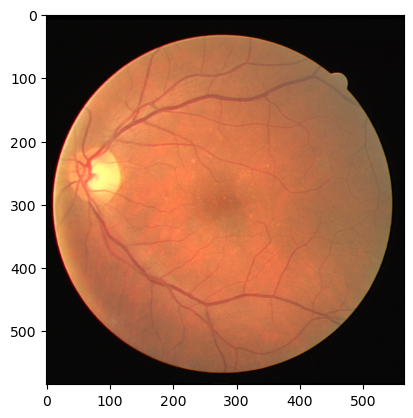

In [83]:
img = tiff.imread('./training/images/21_training.tif')
img_array = np.array(img)
img_array = cv.resize(img_array, (256, 256))
label = Image.open('./training/1st_manual/21_manual1.gif')
label = np.array(label)
label = cv.resize(label, (256, 256))
plt.imshow(img)

In [84]:
label.shape

(256, 256)

In [95]:
img_array = np.array(Image.open('./training/resized_good/21_training.png'))
label = np.array(Image.open('./training/resized_manual/21_manual1.png'))

img_array = cv.resize(img_array, (256, 256))
label = cv.resize(label, (256, 256))

temp = np.array(img_array)
temp[label.astype(np.bool_), 1] = 255
temp = np.clip(temp, 0, 255)

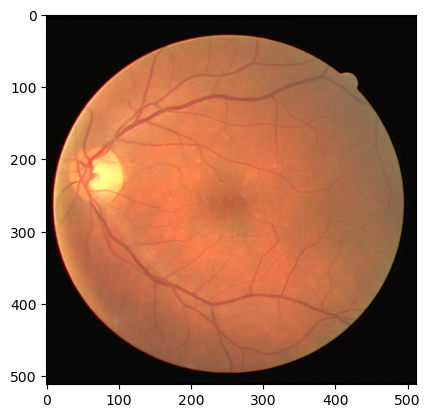

In [94]:
plt.imshow(img_array)

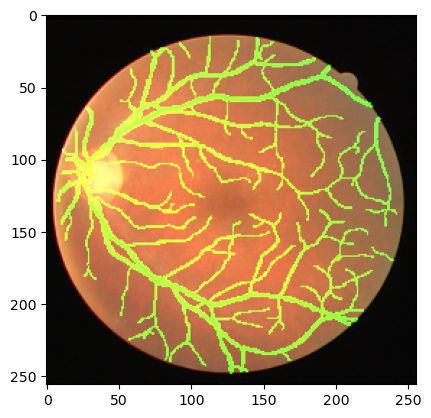

In [96]:
plt.imshow(temp)

(565, 584)

In [27]:
a = Image.open('./resized_images/image/21_training.png')
b = Image.open('./resized_mannual/21_manual1.png')
#a = a.resize((256, 256))
b = b.resize((512, 512))



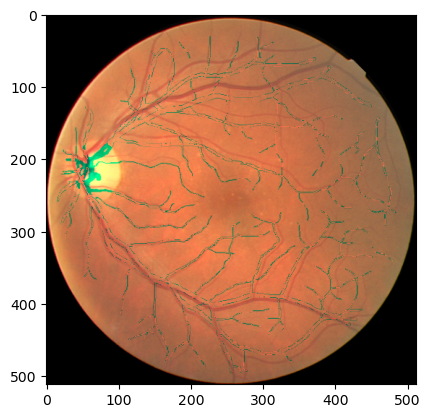

In [28]:
plt.imshow(temp)

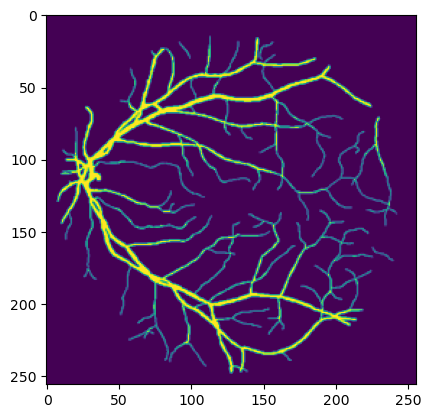

In [20]:
plt.imshow(b_np)

In [73]:
import pandas as pd
import numpy as np
import cv2 as cv
from PIL import Image
import shutil
from tqdm import tqdm

In [10]:
tt = pd.read_csv('./MIL_lq_test.csv')
len(tt)

8471

In [5]:
train_csv = pd.read_csv('./Label_EyeQ_train.csv')
test_csv = pd.read_csv('./Label_EyeQ_test.csv')

In [20]:
test_csv.columns

Index(['Unnamed: 0', 'image', 'quality', 'DR_grade'], dtype='object')

In [36]:
train_reject = train_csv.query('quality == 2')

for i in range(len(train_reject)):
    src = './ori/diabetic-retinopathy-detection/train/' + train_reject.iloc[i].image
    dst = './ori/train_reject/' + train_reject.iloc[i].image
    shutil.copyfile(src, dst)
    #img = Image.open()
    #break

In [37]:
test_reject = test_csv.query('quality == 2')

for i in range(len(test_reject)):
    src = './ori/diabetic-retinopathy-detection/test/' + test_reject.iloc[i].image
    dst = './ori/test_reject/' + test_reject.iloc[i].image
    shutil.copyfile(src, dst)
    #img = Image.open()
    #break

In [62]:
train_csv.loc[1, 'image']

'10009_right.jpeg'

In [8]:
MIL_train = train_csv.query('quality == 0')

In [12]:
MIL_train.to_csv('./MIL_train.csv')

In [7]:
MIL_test = test_csv.query('quality == 0')

In [47]:
MIL_usable_test = test_csv.query('quality == 1')
len(MIL_usable_test)
MIL_usable_test.drop('Unnamed: 0', 1).reset_index()\
                .drop('index', 1)\
                .to_csv('./MIL_usable_test.csv')

/tmp/ipykernel_53079/2755748372.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_usable_test.drop('Unnamed: 0', 1).reset_index()\
/tmp/ipykernel_53079/2755748372.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_usable_test.drop('Unnamed: 0', 1).reset_index()\


In [141]:
MIL_reject_test = test_csv.query('quality == 2')
MIL_reject_test_a = MIL_reject_test.drop('Unnamed: 0', 1)
# len(MIL_reject_test)
# for 
# MIL_reject_test.reset_index()\
#                 .drop('index', 1)\
#                 .to_csv('./MIL_reject_test.csv')

/tmp/ipykernel_53079/3135891081.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_reject_test_a = MIL_reject_test.drop('Unnamed: 0', 1)


In [149]:
MIL_reject_test_a.reset_index()\
                .drop('index', 1)\
                .to_csv('./MIL_reject_test.csv')

/tmp/ipykernel_53079/2486794172.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_reject_test_a.reset_index()\


In [146]:
filelist = os.listdir('./EyeQ/test/resized_reject/image/')
for i in tqdm(range(len(MIL_reject_test))):
    # print(MIL_reject_test.iloc[i]['Unnamed: 0'], \
    #       (MIL_reject_test.iloc[i]['image']))
    
    name = MIL_reject_test.iloc[i]['image']
    pdidx = MIL_reject_test.iloc[i]['Unnamed: 0']
    name = name.split('.')[0] + '.png'      
    
    if name not in filelist:
        print(pdidx, name)
        MIL_reject_test_a = MIL_reject_test_a.drop(int(pdidx), 0)

  0%|                                                                                                                                | 0/3220 [00:00<?, ?it/s]/tmp/ipykernel_53079/1462379576.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_reject_test_a = MIL_reject_test_a.drop(int(pdidx), 0)
/tmp/ipykernel_53079/1462379576.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_reject_test_a = MIL_reject_test_a.drop(int(pdidx), 0)
 20%|██████████████████████▉                                                                                             | 637/3220 [00:00<00:00, 6369.47it/s]/tmp/ipykernel_53079/1462379576.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_reject_test_a = MIL_reject_test_a.drop(int(pd

308 10739_left.png
1463 13227_left.png
6394 23928_left.png
13873 42861_right.png


/tmp/ipykernel_53079/1462379576.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  MIL_reject_test_a = MIL_reject_test_a.drop(int(pdidx), 0)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3220/3220 [00:00<00:00, 11685.14it/s]


In [56]:
from utils_de import *
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

In [54]:
a = Image.open('./ori/train_reject/15337_left.jpeg')

In [61]:
#img = imread('./ori/train_reject/15337_left.jpeg')
img, mask = preprocess(img)

TypeError: 'NoneType' object is not subscriptable

In [28]:
import pandas as pd
import numpy as np
import cv2 as cv
from PIL import Image
import shutil
import os
import tqdm

In [72]:
test_csv = pd.read_csv('./MIL_test.csv')
MIL_lq_test = {'image': [], 'quality': [], 'DR_grade': []}

In [58]:
test_csv.iloc[0]['image'] = 'eee'

/tmp/ipykernel_288476/1308167898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_csv.iloc[0]['image'] = 'eee'


In [57]:
test_csv['']

,Unnamed: 0,image,quality,DR_grade
0,0,10001_right.jpeg,0,2
1,1,10004_right.jpeg,0,0
2,2,10008_left.jpeg,0,0
3,3,10016_right.jpeg,0,2
4,4,10026_left.jpeg,0,0
...,...,...,...,...
8466,8466,9983_left.jpeg,0,0
8467,8467,9988_left.jpeg,0,1
8468,8468,9988_right.jpeg,0,1
8469,8469,9990_left.jpeg,0,3


In [51]:
test_csv[test_csv.image == '10001_right.jpeg'].iloc[0]['image']

'10001_right.jpeg'

In [4]:
test_csv = pd.read_csv('./MIL_test.csv')
MIL_lq_test = {'image': [], 'quality': [], 'DR_grade': []}

image_list = sorted([e for e in os.listdir('../visual/compared_method/cofenet/eyeqtest/') if '.png' in e])


for e in tqdm.tqdm(image_list):
    real_name = e.split('_')
    real_name = real_name[0]+'_'+real_name[1] + '.jpeg'
    #print(real_name)
    #break
    tt = test_csv[test_csv.image == real_name].iloc[0]
    
    MIL_lq_test['image'].append(e)
    MIL_lq_test['quality'].append(tt.quality)
    MIL_lq_test['DR_grade'].append(tt.DR_grade)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8471/8471 [00:02<00:00, 3137.50it/s]


In [5]:
MIL_lq_test_csv = pd.DataFrame.from_dict(MIL_lq_test)

In [6]:
MIL_lq_test_csv

,image,quality,DR_grade
0,10001_right_2.png,0,2
1,10004_right_15.png,0,0
2,10008_left_8.png,0,0
3,10016_right_6.png,0,2
4,10026_left_3.png,0,0
...,...,...,...
8466,9983_left_7.png,0,0
8467,9988_left_7.png,0,1
8468,9988_right_7.png,0,1
8469,9990_left_6.png,0,3


In [75]:
MIL_lq_test_csv.to_csv('MIL_lq_test.csv')

In [1]:
import os
import random
import time

import torch
from torch.utils.data import DataLoader
import torch
import cv2 as cv
import numpy as np
from torch.utils.data import Dataset

In [2]:
torch.manual_seed(2023)
torch.cuda.manual_seed(2023)
np.random.seed(2023)
random.seed(2023)

In [3]:
class EyeQTestTest(Dataset):
    #every 7 Synthetic low-quality image, has 1 high-quality image
    
    def __init__(self, cfgs):
        self.lq_path = os.path.join('./EyeQ/', 'test', 'degraded_good', 'de_image')
        self.hq_path = os.path.join('./EyeQ/', 'test', 'resized_good', 'image')
        self.mask_path = os.path.join('./EyeQ/', 'test', 'resized_good', 'mask')
        self.json_path = os.path.join('./EyeQ/', 'test', 'degraded_good', 'de_js_file')
        self.de2num = {'001': 0,
                       '010': 1,
                       '011': 2, 
                       '100': 3,
                       '101': 4,
                       '110': 5,
                       '111': 6,}
        
        
        self.namelist = self._init_filename()
        
        self.resize = 0      
        self.vislist = []
        #self.this_r = None
    
    def _empty_vislist(self):
        self.vislist = []
        
    def _init_filename(self):
        
        #image index list
        
        temp_namelist = os.listdir(self.hq_path)
        temp_namelist = [e.split('.')[0] for e in temp_namelist if '.png' in e]
        
        return temp_namelist
    

    def _load_image(self, idx, v):
        sampled_img = None

        #randomly choose degraded type
        r = random.randint(0, 15)
        self.this_r = r
        #print(f'type {self.de_type[r]} is selected')
        return self.namelist[idx] + '_'  + str(r) + '.png'
        
    def __len__(self):
        return len(self.namelist)
    
    def __getitem__(self, idx):
        #print(f'{idx} is selected')
        aa = self._load_image(idx, 'lq')     
        
        return aa

In [4]:
testloader = DataLoader(EyeQTestTest(None), batch_size=1, shuffle=False)
lq_namelist = []
for e in testloader:
    lq_namelist.append(e[0])

In [7]:
sorted_lq_namelist = sorted(lq_namelist)

In [29]:
test_csv = pd.read_csv('./MIL_test.csv')
MIL_lq_test = {'image': [], 'quality': [], 'DR_grade': []}

for e in tqdm.tqdm(sorted_lq_namelist):
    real_name = e.split('_')
    real_name = real_name[0]+'_'+real_name[1] + '.jpeg'
    #print(real_name)
    #break
    tt = test_csv[test_csv.image == real_name].iloc[0]
    
    MIL_lq_test['image'].append(e)
    MIL_lq_test['quality'].append(tt.quality)
    MIL_lq_test['DR_grade'].append(tt.DR_grade)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8471/8471 [00:02<00:00, 3079.05it/s]


In [30]:
MIL_lq_test_csv = pd.DataFrame.from_dict(MIL_lq_test)

In [37]:
MIL_lq_test_csv.to_csv('MIL_lq_test.csv')

In [36]:
MIL_lq_test_csv[:10].to_csv('MIL_lq_test.csv')

In [27]:
isecret_out =os.listdir('../visual/compared_method/stillgan//eyeqtest/')
sorted(isecret_out)[:10]

['10001_right_12.png',
 '10004_right_14.png',
 '10008_left_12.png',
 '10016_right_10.png',
 '10026_left_10.png',
 '10026_right_3.png',
 '10033_left_3.png',
 '10033_right_9.png',
 '10037_left_9.png',
 '1003_left_5.png']